# Предобработка данных

## Импортируем необходимые библиотеки

In [2]:
import numpy as np
import pandas as pd
from pandas import read_csv, DataFrame, Series
from sklearn.feature_extraction import DictVectorizer as DV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Загружаем 1-датасет и 2-датасет

In [3]:
DataSet   = pd.read_csv('DataSet.csv')
DataSet_1 = pd.read_csv('DataSet_1.csv')

## Имеем датасет с атрибутами dummy , class,  решетка , sup , mis , misr , omega , inst.

In [4]:
DataSet.head()

dummy  class  #  sup  cpm    mis  misr dir  omega  inst
0      1      1  0    3    0  120.0  21.0  ao   1000     1
1      1      1  1    3    0   55.0   7.5  aa   1000     1
2      1      1  2    3    0   26.0   1.4  vo   1000     1
3      1      1  3    3    0   11.0   0.8  va   1000     1
4      1      1  4    2    0    7.0   5.5  ao   1000     1

In [5]:
DataSet.shape

(9254, 10)

## Имеем датасет выходных классов Class_Predict и параметра inst.

In [6]:
DataSet_1.head()

Class_Predict  inst
0              1    15
1              1    16
2              1    21
3              1    22
4              1    34

In [7]:
DataSet_1.shape

(209, 2)

##  Объединяем два исходных датасета

In [8]:
DataSet_2=pd.merge(DataSet,DataSet_1)

In [9]:
DataSet_2.head()

dummy  class  #  sup  cpm    mis  misr dir  omega  inst  Class_Predict
0      1      1  0    3    0  120.0  21.0  ao   1000     1              7
1      1      1  1    3    0   55.0   7.5  aa   1000     1              7
2      1      1  2    3    0   26.0   1.4  vo   1000     1              7
3      1      1  3    3    0   11.0   0.8  va   1000     1              7
4      1      1  4    2    0    7.0   5.5  ao   1000     1              7

In [10]:
DataSet_2.shape

(9180, 11)

##  Убираем атрибуты  dummy, class и решетка.

In [11]:
DataSet_3=DataSet_2[['sup','cpm','mis','dir','omega','Class_Predict']]

In [12]:
DataSet_3.head()

sup  cpm    mis dir  omega  Class_Predict
0    3    0  120.0  ao   1000              7
1    3    0   55.0  aa   1000              7
2    3    0   26.0  vo   1000              7
3    3    0   11.0  va   1000              7
4    2    0    7.0  ao   1000              7

## Преобразование категориальных признаков dir в direncoder.


In [13]:
Encoder=LabelEncoder()
DataSet_3['direncoder']=Encoder.fit_transform(DataSet_3.dir)

C:\Users\Vitaly\AppData\Local\Temp/ipykernel_1388/3572687894.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataSet_3['direncoder']=Encoder.fit_transform(DataSet_3.dir)


In [14]:
DataSet_Work=DataSet_3[['sup','cpm','mis','direncoder','omega','Class_Predict']]

## Получаем рабочий датасет.

## Входные параметры:

### sup  -  поддержка машины , где проводились измерения. 
### cpm -  частота имерения.
### mis  -  измерения.
### direncoder -  фильтр, тип измерения и направление.
### omega - обороты в минуту машины.

## Выходные параметры:
### Class_Predict: 

###  1  - Проблемы конструкции.
###  2  - Неисправные Подшипники.
###  3  - Механическое Ослабление.
###  4  - Искажения.
###  5  - Разбалансировка.
###  6  - Нормальное состояние. 
###  7  - Несоосность вала.
###  8  - Проблемы в насосе.
###  9  - Проблемы в моторе.
###  10 -Проблемы в машине.

###  11 - Class_Predict_1 +  Class_Predict_2.
###  12 - Class_Predict_1 +  Class_Predict_3.
###  13 - Class_Predict_1 +  Class_Predict_5.
###  14 - Class_Predict_1 +  Class_Predict_8.
###  15 - Class_Predict_1 +  Class_Predict_9.
###  16 - Class_Predict_2 +  Class_Predict_7.
###  17 - Class_Predict_3 +  Class_Predict_4.
###  18 - Class_Predict_3 +  Class_Predict_7.
###  19 - Class_Predict_4 +  Class_Predict_8.
###  20 - Class_Predict_4 +  Class_Predict_9.
###  21 - Class_Predict_5 +  Class_Predict_7.















In [15]:
DataSet_Work=DataSet_Work.drop('Class_Predict', 1)

C:\Users\Vitaly\AppData\Local\Temp/ipykernel_1388/3112058546.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  DataSet_Work=DataSet_Work.drop('Class_Predict', 1)


## Описательная статистика

In [16]:
DataSet_Work.describe()

sup           cpm          mis   direncoder        omega
count  9180.000000   9180.000000  9180.000000  9180.000000  9180.000000
mean      2.548584   8184.880937     6.637209     4.317429  2462.854031
std       1.039336  11256.934732    22.189728     2.322627   738.777992
min       0.000000      0.000000     0.000000     0.000000  1000.000000
25%       2.000000      0.000000     0.900000     3.000000  1500.000000
50%       3.000000   3000.000000     2.050000     4.000000  3000.000000
75%       3.000000  12000.000000     5.500000     5.000000  3000.000000
max       4.000000  90000.000000   704.000000     9.000000  3000.000000

## Пропусков в датасете нет

In [17]:
DataSet_Work.isna().sum()

sup           0
cpm           0
mis           0
direncoder    0
omega         0
dtype: int64

## Распределение входных параметров.

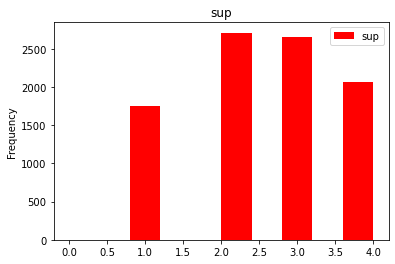

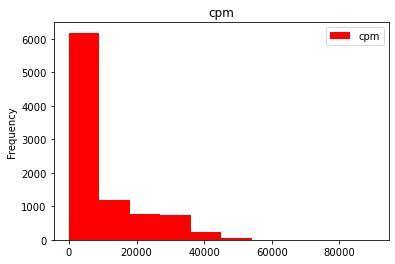

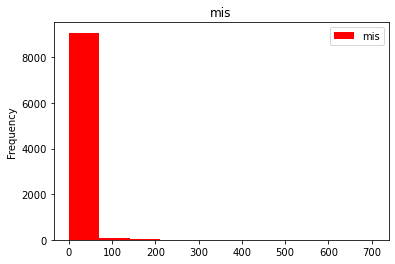

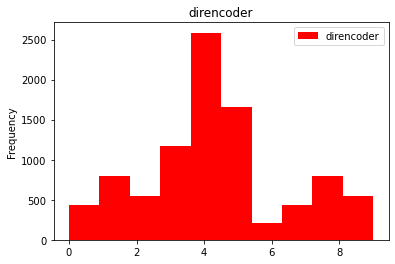

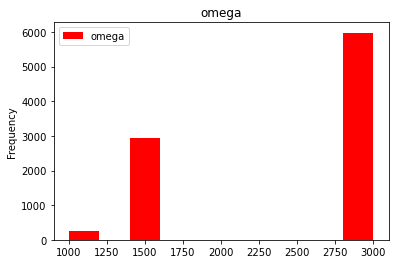

In [18]:
DataSet_Work.plot(y='sup',        kind='hist', color='red',  title='sup')
DataSet_Work.plot(y='cpm',        kind='hist', color='red',  title='cpm')
DataSet_Work.plot(y='mis',        kind='hist', color='red',  title='mis')
DataSet_Work.plot(y='direncoder', kind='hist', color='red',  title='direncoder')
DataSet_Work.plot(y='omega',      kind='hist', color='red',  title='omega')
plt.show()

## Корреляция данных

In [19]:
hm = DataSet_Work.corr()

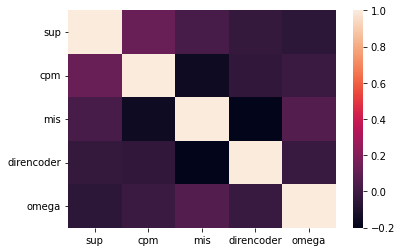

In [20]:
g = sns.heatmap(hm, annot = False, annot_kws={'size':200})

## Нормализация

In [21]:
names = DataSet_Work.columns
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(DataSet_Work)

In [22]:
scaled_DataSet_Work = pd.DataFrame(scaled_features, columns=names)
scaled_DataSet_Work.head()

sup  cpm       mis  direncoder  omega
0  0.75  0.0  0.170455    0.111111    0.0
1  0.75  0.0  0.078125    0.000000    0.0
2  0.75  0.0  0.036932    0.888889    0.0
3  0.75  0.0  0.015625    0.777778    0.0
4  0.50  0.0  0.009943    0.111111    0.0

## Гистограммы распределения признаков после нормализации

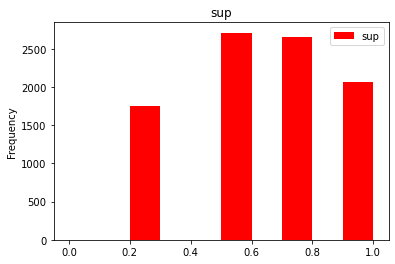

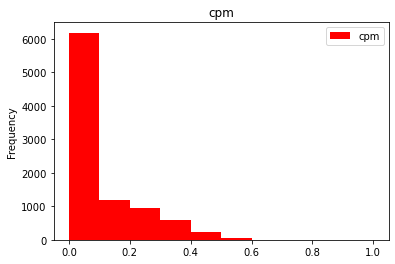

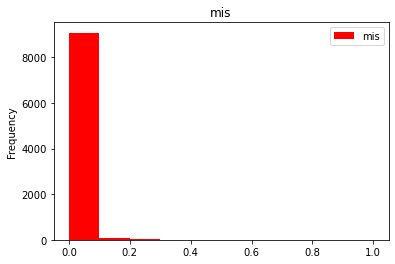

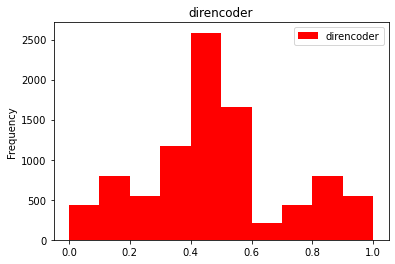

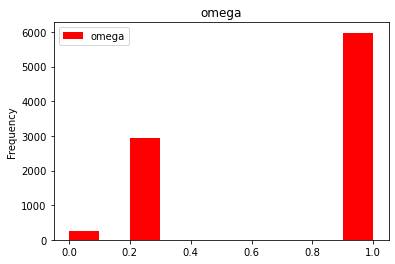

In [23]:
scaled_DataSet_Work.plot(y='sup',        kind='hist', color='red',  title='sup')
scaled_DataSet_Work.plot(y='cpm',        kind='hist', color='red',  title='cpm')
scaled_DataSet_Work.plot(y='mis',        kind='hist', color='red',  title='mis')
scaled_DataSet_Work.plot(y='direncoder', kind='hist', color='red',  title='direncoder')
scaled_DataSet_Work.plot(y='omega',      kind='hist', color='red',  title='omega')
plt.show()

## Стандартизация

In [24]:
names = DataSet_Work.columns
standart= StandardScaler()
standart_features = standart.fit_transform(DataSet_Work)

In [25]:
standart_DataSet_Work = pd.DataFrame(standart_features, columns=names)
standart_DataSet_Work.head()

sup       cpm       mis  direncoder     omega
0  0.434355 -0.727136  5.109074   -1.428387 -1.980207
1  0.434355 -0.727136  2.179631   -1.858957 -1.980207
2  0.434355 -0.727136  0.872649    1.585606 -1.980207
3  0.434355 -0.727136  0.196624    1.155035 -1.980207
4 -0.527850 -0.727136  0.016350   -1.428387 -1.980207

## Гистограммы распределения признаков после стандартизации

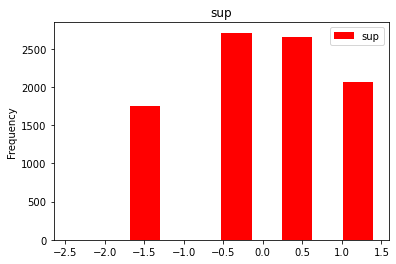

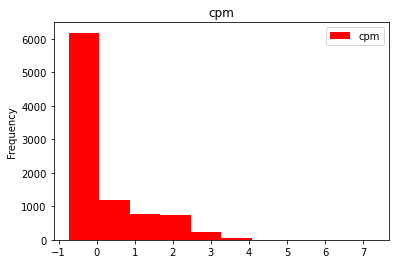

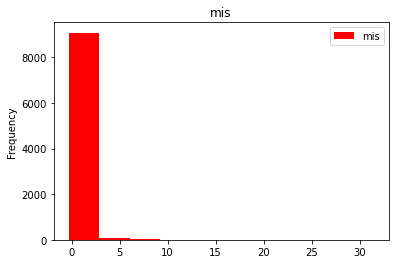

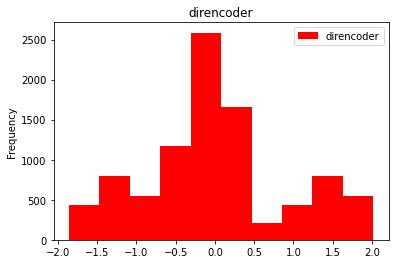

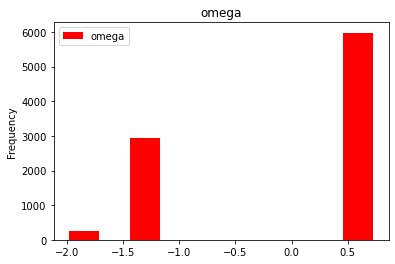

In [26]:
standart_DataSet_Work.plot(y='sup',        kind='hist', color='red',  title='sup')
standart_DataSet_Work.plot(y='cpm',        kind='hist', color='red',  title='cpm')
standart_DataSet_Work.plot(y='mis',        kind='hist', color='red',  title='mis')
standart_DataSet_Work.plot(y='direncoder', kind='hist', color='red',  title='direncoder')
standart_DataSet_Work.plot(y='omega',      kind='hist', color='red',  title='omega')
plt.show()

## Посмотрим на диаграмму ящик с усами

In [27]:
Data=standart_DataSet_Work[['sup','cpm','mis','direncoder','omega']]

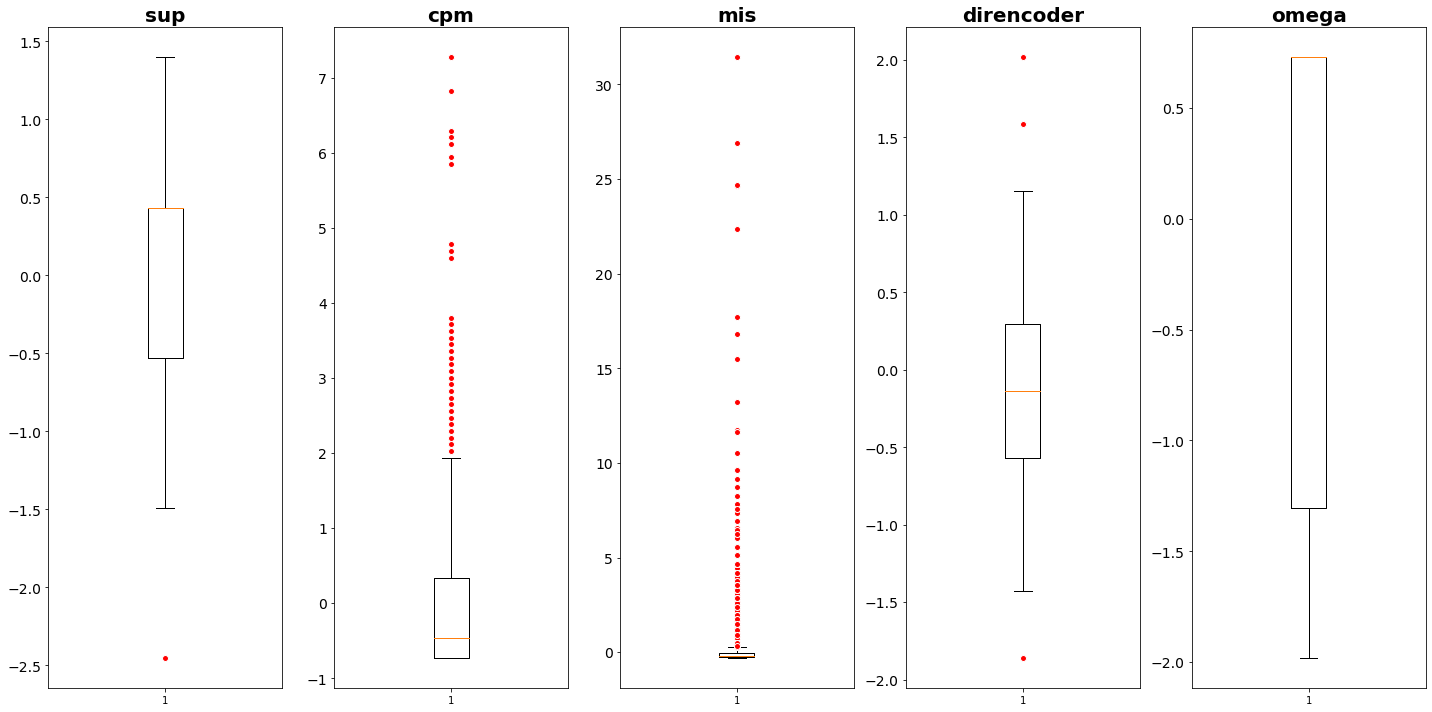

In [28]:
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(Data.columns), figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(Data.iloc[:,i], flierprops=red_circle)
    ax.set_title(Data.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
plt.tight_layout()

# Построим классификаторы

In [29]:
from sklearn.ensemble  import RandomForestClassifier
from sklearn.ensemble  import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm       import SVC
from sklearn.tree      import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from  sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import pylab as pl

In [30]:
X = scaled_DataSet_Work
Y = DataSet_3['Class_Predict']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)
itog_val = {}

## RandomForestClassifier

In [397]:
model_RandomForestClassifier = RandomForestClassifier(n_estimators = 100)

In [398]:
model_RandomForestClassifier.fit(X_train, y_train)

RandomForestClassifier()

In [399]:
train_predictions_RandomForestClassifier = model_RandomForestClassifier.predict(X_train) 
test_predictions_RandomForestClassifier  = model_RandomForestClassifier.predict(X_test) 

## Перекрестная 5 -кратная проверка.

In [400]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
base_cv_scores = cross_val_score(model_RandomForestClassifier, X, Y, cv=cv, scoring='accuracy')

In [401]:
itog_val['RandomForestClassifier'] = base_cv_scores.mean()

## Матрица ошибок 

In [402]:
print(confusion_matrix(test_predictions_RandomForestClassifier, y_test))

[[ 13   8   2   4   4   8  35   8   7  19   5   2   2   0   1   3   3   4
    0   1   1]
 [ 14  55   4   2   5  33  22  54   7  41  12   1   0   0   1   1   0   0
    1   1   0]
 [  2   4   8   1   3   6  10   3   7   6   0   1   0   1   0   2   0   0
    0   1   0]
 [  1   0   1   1   2   0   7   2   2   8   0   0   0   1   2   1   1   0
    1   0   0]
 [  4   6   4   2   8   8  17  11   6   6   0   2   2   3   0   3   1   0
    1   0   2]
 [ 14  41   0   8   8  70  23  42   7  33  10   1   0   0   1   2   0   0
    0   1   0]
 [ 48  16  16   9  28  18 160  32  20  52   4   7   6   6   3   5   6   7
    5   1   6]
 [ 10  50   5   2   8  27  46  70   9  46  16   3   0   0   0   1   0   1
    1   0   2]
 [ 10  10   3   6   7   8  22  12  10  11   0   3   1   0   0   1   2   0
    0   2   1]
 [ 24  55  13  12  21  38  63  42  27  94   7   3   7   2   5   9   1   1
    2   6   2]
 [  2   7   0   0   0   2   3  13   3   2  11   0   0   0   0   0   0   0
    0   0   0]
 [  1   1   1   1   1

## Добавим PCA-метод главных компонент.

In [403]:
model = Pipeline([
        ('pca', PCA(n_components = 3)),
        ('clf', RandomForestClassifier(n_estimators = 100))
    ])

In [404]:
model.fit(X,Y)

Pipeline(steps=[('pca', PCA(n_components=3)),
                ('clf', RandomForestClassifier())])

In [405]:
test_predictions_model  = model.predict(X_test) 

In [406]:
test=accuracy_score(y_test,test_predictions_model)

In [407]:
test

0.7481481481481481

## KNeighborsClassifier

In [408]:
knn = KNeighborsClassifier(n_neighbors=18)

In [409]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=18)

In [410]:
train_predictions_knn = knn.predict(X_train) 
test_predictions_knn  = knn.predict(X_test) 

## Перекрестная 5 -кратная проверка.

In [411]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
base_cv_scores = cross_val_score(knn, X, Y, cv=cv, scoring='accuracy')

In [412]:
itog_val['KNeighborsClassifier'] = base_cv_scores.mean()

## Матрица ошибок 

In [413]:
print(confusion_matrix(test_predictions_knn, y_test))

[[  2   2   1   1   4   3  21   2   2   6   0   0   0   1   0   1   0   1
    0   1   1]
 [ 10  52   1   0   5  36  31  57   8  33  21   0   0   0   1   0   0   0
    0   0   0]
 [  1   1   0   1   1   3   1   0   2   0   0   0   0   0   0   1   0   0
    0   0   0]
 [  0   1   0   0   0   1   0   0   1   1   0   0   0   0   0   0   0   0
    0   0   0]
 [  1   4   8   5   5   6  10   5   4   4   0   2   1   0   0   0   1   0
    1   0   1]
 [  8  46   0   4   3  72  33  54   6  27   9   0   1   0   0   2   0   0
    0   0   0]
 [ 82  38  28  19  48  36 219  57  37  98   2  15  11   9   6   8  13   9
   12   7  13]
 [ 14  56   1   0   8  25  31  69   9  39  22   0   0   0   0   0   0   0
    0   0   0]
 [  4   2   1   0   0   1   4   1   2   3   0   0   2   0   0   0   0   0
    0   0   0]
 [ 30  56  22  23  32  41  95  52  42 130   8   9   5   3   9  18   0   4
    2   5   1]
 [  0   0   0   0   0   0   1   0   0   1   3   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   0

## Добавим PCA-метод главных компонент.

In [416]:
model = Pipeline([
        ('pca', PCA(n_components = 3)),
        ('clf', KNeighborsClassifier(n_neighbors=18))
    ])

In [417]:
model.fit(X,Y)

Pipeline(steps=[('pca', PCA(n_components=3)),
                ('clf', KNeighborsClassifier(n_neighbors=18))])

In [418]:
test_predictions_model  = model.predict(X_test) 

In [419]:
test=accuracy_score(y_test,test_predictions_model)

In [420]:
test

0.32113289760348585

## GradientBoostingClassifier

In [423]:
model_GradientBoostingClassifier = GradientBoostingClassifier()

In [424]:
model_GradientBoostingClassifier.fit(X_train, y_train)

GradientBoostingClassifier()

In [425]:
train_predictions_GradientBoostingClassifier = model_GradientBoostingClassifier.predict(X_train) 
test_predictions_GradientBoostingClassifier  = model_GradientBoostingClassifier.predict(X_test) 

## Перекрестная 5 -кратная проверка.

In [426]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
base_cv_scores = cross_val_score(model_GradientBoostingClassifier, X, Y, cv=cv, scoring='accuracy')

In [427]:
itog_val['GradientBoostingClassifier'] = base_cv_scores.mean()

##  Матрица ошибок 

In [428]:
print(confusion_matrix(test_predictions_GradientBoostingClassifier, y_test))

[[  5   0   0   0   3   0   4   1   2   0   0   0   0   0   0   0   0   0
    0   0   0]
 [ 13  44   0   0   0  21  16  33   3  18  10   0   0   0   0   0   0   0
    1   0   0]
 [  1   1   4   0   0   1   4   0   1   1   0   0   0   0   1   0   0   0
    0   0   1]
 [  1   0   0   0   0   0   1   0   0   0   0   0   0   0   1   0   0   0
    0   0   0]
 [  1   0   0   2   3   0   1   0   1   0   0   0   0   0   0   0   0   0
    0   0   1]
 [  3  54   1   4   2 106  14  42   4  30  13   0   0   0   0   0   0   0
    0   0   0]
 [ 80  33  31  20  54  24 262  56  36 106   2  20  15  11   8   9  13   9
   13   6   9]
 [ 12  56   0   0   5  20  32 108   9  43  33   0   0   0   0   0   0   0
    0   0   0]
 [  3   1   1   0   1   0   2   1   6   7   0   0   0   0   1   1   0   1
    0   2   0]
 [ 28  63  25  27  36  52  97  52  47 133   3   6   4   1   5  20   0   3
    1   5   5]
 [  0   4   0   0   0   0   0   2   1   0   4   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   0

## Добавим PCA-метод главных компонент.

In [429]:
model = Pipeline([
        ('pca', PCA(n_components = 3)),
        ('clf', GradientBoostingClassifier())
    ])

In [430]:
model.fit(X,Y)

Pipeline(steps=[('pca', PCA(n_components=3)),
                ('clf', GradientBoostingClassifier())])

In [431]:
test_predictions_model  = model.predict(X_test) 

In [432]:
test=accuracy_score(y_test,test_predictions_model)

In [433]:
test

0.40871459694989104

## SVC

In [435]:
SVC_model = SVC(probability=True)

In [436]:
SVC_model.fit(X_train,y_train)

SVC(probability=True)

In [437]:
train_predictions_SVC_model = SVC_model.predict(X_train) 
test_predictions_SVC_model  = SVC_model.predict(X_test) 

## Перекрестная 5 -кратная проверка.

In [439]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
base_cv_scores = cross_val_score(SVC_model, X, Y, cv=cv, scoring='accuracy')

In [441]:
itog_val['SVC'] = base_cv_scores.mean()

## Матрица ошибок 

In [442]:
print(confusion_matrix(test_predictions_SVC_model, y_test))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  5   7   0   0   1  10   4  11   0  11   9   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  6  19   0   0   2  17   8  17   1   9   7   0   0   0   0   0   0   0
    0   0   0]
 [102  61  54  48  89  74 318  81  75 191   0  22  17  12  14  23  14  12
   14   9  13]
 [ 26 141   0   0   8 115  81 169  14  73  49   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [ 13  30   8   5   6   8  35  19  23  58   0   4   3   1   2   7   0   2
    1   4   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   0

## Добавим PCA-метод главных компонент.

In [443]:
model = Pipeline([
        ('pca', PCA(n_components = 3)),
        ('clf', GradientBoostingClassifier())
    ])

In [444]:
model.fit(X,Y)

Pipeline(steps=[('pca', PCA(n_components=3)),
                ('clf', GradientBoostingClassifier())])

In [445]:
test_predictions_model  = model.predict(X_test) 

In [446]:
test=accuracy_score(y_test,test_predictions_model)

In [447]:
test

0.4065359477124183

## DecisionTreeClassifier

In [448]:
model_DecisionTreeClassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

In [449]:
model_DecisionTreeClassifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [450]:
train_predictions_DecisionTreeClassifier = model_DecisionTreeClassifier.predict(X_train) 
test_predictions_DecisionTreeClassifier = model_DecisionTreeClassifier.predict(X_test) 

## Перекрестная 5 -кратная проверка.

In [451]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
base_cv_scores = cross_val_score(model_DecisionTreeClassifier, X, Y, cv=cv, scoring='accuracy')

In [452]:
itog_val['DecisionTreeClassifier'] = base_cv_scores.mean()

##  Матрица ошибок 

In [453]:
print(confusion_matrix(test_predictions_DecisionTreeClassifier, y_test))

[[ 22  12   4   6   7   9  43  14   9  34   5   3   2   0   2   2   3   4
    1   0   3]
 [ 14  79   5   5  10  41  27  65   8  48  14   2   0   0   0   1   0   0
    0   3   0]
 [  7   5  11   2   4   6  12   4   5   9   0   1   0   0   0   1   0   0
    0   1   2]
 [  3   4   3   6   2   0  12   4   3   9   0   1   0   2   2   0   0   0
    1   0   0]
 [  6   4   7   5  15  10  28  12   7   7   0   5   5   2   1   5   2   0
    4   0   2]
 [ 12  40   2   5   6  77  32  40  11  36  13   2   2   0   1   3   0   1
    1   1   0]
 [ 39  20  12   8  23  23 154  35  22  60   4   4   5   5   1   6   6   6
    1   1   4]
 [ 13  45   4   1   5  20  38  59  13  37  15   2   0   0   1   1   0   1
    0   0   1]
 [  3   9   2   3   4   4  15  11   8   8   1   1   1   0   0   3   2   0
    1   3   2]
 [ 22  28   9   9  15  28  48  33  19  78   4   2   5   3   7   5   0   1
    3   4   1]
 [  2   7   0   0   1   2   4  14   2   3   9   0   0   0   0   0   0   0
    0   0   0]
 [  0   1   0   0   2

## Добавим PCA-метод главных компонент.

In [454]:
model = Pipeline([
        ('pca', PCA(n_components = 3)),
        ('clf', DecisionTreeClassifier(criterion = 'entropy', random_state = 0))
    ])

In [455]:
model.fit(X,Y)

Pipeline(steps=[('pca', PCA(n_components=3)),
                ('clf',
                 DecisionTreeClassifier(criterion='entropy', random_state=0))])

In [456]:
test_predictions_model  = model.predict(X_test) 

In [457]:
test=accuracy_score(y_test,test_predictions_model)

In [458]:
test

0.7455337690631808

## Средний показатель тестов перекрестной проверки каждой модели классификаторов

<AxesSubplot:>

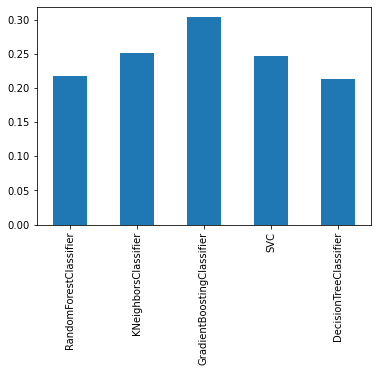

In [459]:
DataFrame.from_dict(data = itog_val, orient='index').plot(kind='bar', legend=False)

## Анализ ROC-AUC для RandomForestClassifier

In [460]:
y_prob = model_RandomForestClassifier.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(
    y_test, y_prob, multi_class="ovo", average="weighted"
)
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(
    y_test, y_prob, multi_class="ovr", average="weighted"
)
print(
    "One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
    "(weighted by prevalence)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo)
)
print(
    "One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
    "(weighted by prevalence)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr)
)

One-vs-One ROC AUC scores:
0.610107 (macro),
0.631671 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.619463 (macro),
0.650736 (weighted by prevalence)


## Анализ ROC-AUC для KNeighborsClassifier.

In [461]:
y_prob = knn.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(
    y_test, y_prob, multi_class="ovo", average="weighted"
)
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(
    y_test, y_prob, multi_class="ovr", average="weighted"
)
print(
    "One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
    "(weighted by prevalence)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo)
)
print(
    "One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
    "(weighted by prevalence)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr)
)

One-vs-One ROC AUC scores:
0.556708 (macro),
0.597001 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.569024 (macro),
0.638873 (weighted by prevalence)


## Анализ ROC-AUC для GradientBoostingClassifier.

In [462]:
y_prob = model_GradientBoostingClassifier.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(
    y_test, y_prob, multi_class="ovo", average="weighted"
)
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(
    y_test, y_prob, multi_class="ovr", average="weighted"
)
print(
    "One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
    "(weighted by prevalence)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo)
)
print(
    "One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
    "(weighted by prevalence)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr)
)

One-vs-One ROC AUC scores:
0.696608 (macro),
0.721146 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.734382 (macro),
0.728478 (weighted by prevalence)


## Анализ ROC-AUC для SVC.

In [463]:
y_prob = SVC_model.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(
    y_test, y_prob, multi_class="ovo", average="weighted"
)
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(
    y_test, y_prob, multi_class="ovr", average="weighted"
)
print(
    "One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
    "(weighted by prevalence)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo)
)
print(
    "One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
    "(weighted by prevalence)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr)
)

One-vs-One ROC AUC scores:
0.642547 (macro),
0.672920 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.705083 (macro),
0.670699 (weighted by prevalence)


## Анализ ROC-AUC для  DecisionTreeClassifier.

In [464]:
y_prob = model_DecisionTreeClassifier.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(
    y_test, y_prob, multi_class="ovo", average="weighted"
)
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(
    y_test, y_prob, multi_class="ovr", average="weighted"
)
print(
    "One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
    "(weighted by prevalence)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo)
)
print(
    "One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
    "(weighted by prevalence)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr)
)

One-vs-One ROC AUC scores:
0.543487 (macro),
0.558649 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.545499 (macro),
0.576399 (weighted by prevalence)


## Посмотрим данные в сжатом пространстве методом PCA. 

In [31]:
pca = PCA(n_components=2)

In [32]:
Components = pca.fit_transform(X)

In [33]:
Df = pd.DataFrame(data = Components, columns = ['component 1', 'component 2'])

### Вместо 5-ти компонет в начальном датасете после сжатия мы получаем 2.

In [34]:
Df

component 1  component 2
0        0.726092    -0.290186
1        0.723511    -0.360934
2        0.748180     0.218802
3        0.745233     0.146801
4        0.707027    -0.098894
...           ...          ...
9175     0.489390    -0.102529
9176     0.489651    -0.104951
9177     0.492883    -0.034186
9178     0.510116    -0.198036
9179     0.475871     0.228256

[9180 rows x 2 columns]

In [35]:
Df_PCA = pd.concat([Df, DataSet_3['Class_Predict']], axis = 1)

In [36]:
Df_PCA

component 1  component 2  Class_Predict
0        0.726092    -0.290186              7
1        0.723511    -0.360934              7
2        0.748180     0.218802              7
3        0.745233     0.146801              7
4        0.707027    -0.098894              7
...           ...          ...            ...
9175     0.489390    -0.102529              6
9176     0.489651    -0.104951              6
9177     0.492883    -0.034186              6
9178     0.510116    -0.198036              6
9179     0.475871     0.228256              6

[9180 rows x 3 columns]

## Добавим метки цвета к искомым классам.

In [37]:
DataSet_labelColor = pd.read_csv('DataSet_2.csv')

In [38]:
DataSet_labelColor

Class_Predict     color
0               1   color_1
1               2   color_2
2               3   color_3
3               4   color_4
4               5   color_5
5               6   color_6
6               7   color_7
7               8   color_8
8               9   color_9
9              10  color_10
10             11  color_11
11             12  color_12
12             13  color_13
13             14  color_14
14             15  color_15
15             16  color_16
16             17  color_17
17             18  color_18
18             19  color_19
19             20  color_20
20             21  color_21

In [39]:
Df_PCA_Work=pd.merge(Df_PCA,DataSet_labelColor)

In [40]:
Df_PCA_Work

component 1  component 2  Class_Predict     color
0        0.726092    -0.290186              7   color_7
1        0.723511    -0.360934              7   color_7
2        0.748180     0.218802              7   color_7
3        0.745233     0.146801              7   color_7
4        0.707027    -0.098894              7   color_7
...           ...          ...            ...       ...
9175    -0.260798    -0.208541             13  color_13
9176    -0.261584    -0.201285             13  color_13
9177    -0.258716    -0.127344             13  color_13
9178    -0.255645    -0.054921             13  color_13
9179    -0.234058    -0.159090             13  color_13

[9180 rows x 4 columns]

## Визуализируем искомые классы.

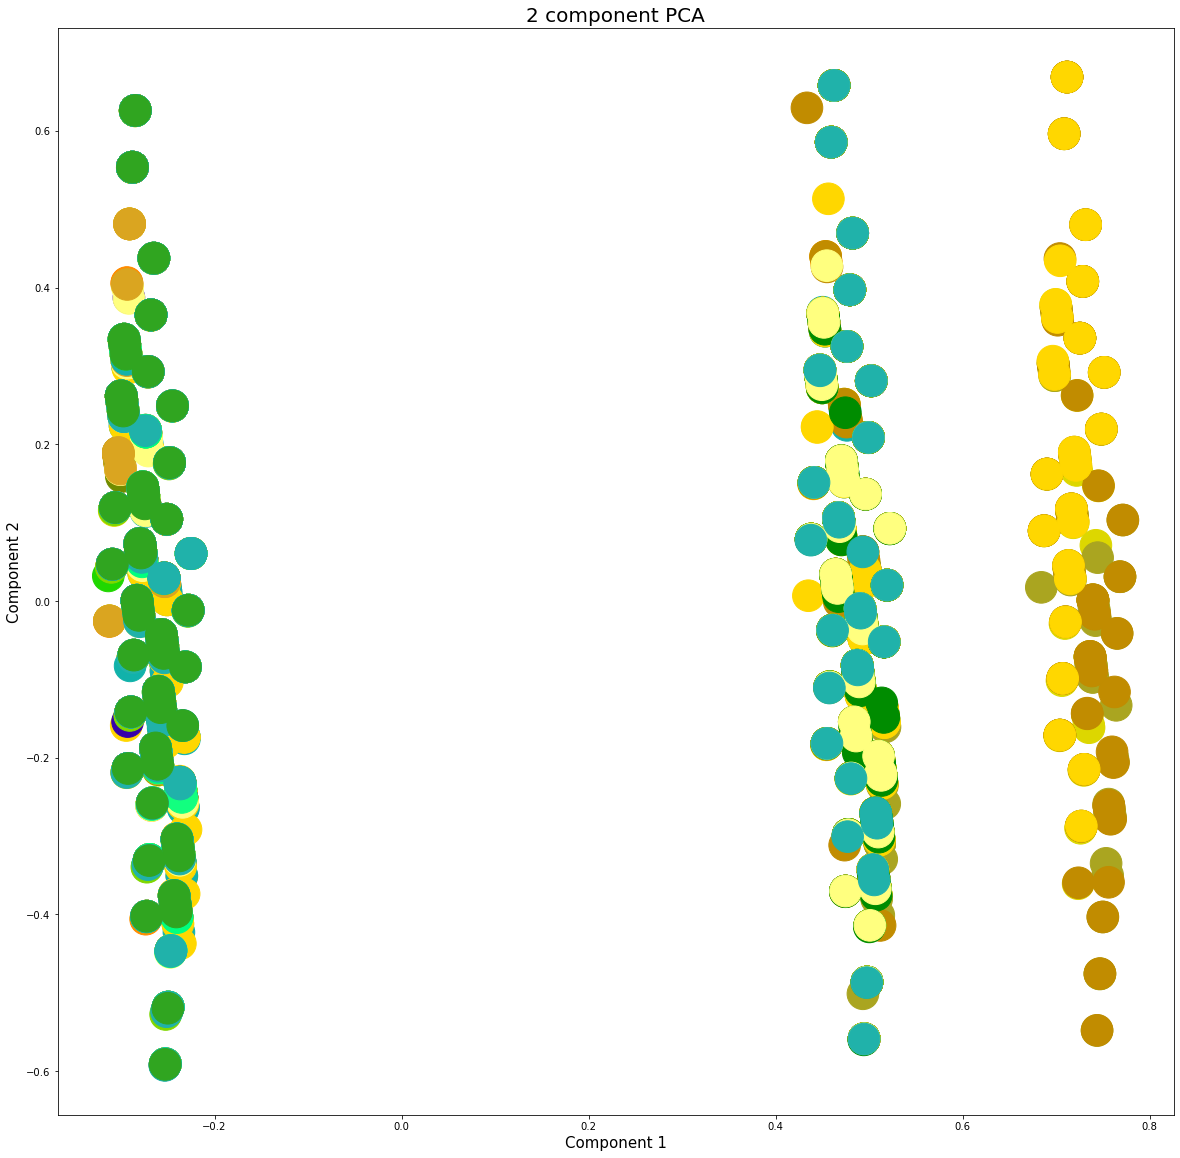

In [57]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Component 1',    fontsize = 15)
ax.set_ylabel('Component 2',    fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

colors  = {'color_1':'#FF8C00', 
           'color_2':'#FFD700', 
           'color_3':'#DAA520',
           'color_4':'#00FF7F',
           'color_5':'#20B2AA',                                                                
           'color_6':'#C18C00', 
           'color_7':'#DDD700', 
           'color_8':'#AAA520',
           'color_9':'#FFFF7F',
          'color_10':'#11B2AA',                                                                
          'color_11':'#008C00', 
          'color_12':'#20D700', 
          'color_13':'#30A520',
          'color_14':'#40FF7F',
          'color_15':'#3602AA',                                                                
          'color_16':'#708C00', 
          'color_17':'#80D700', 
          'color_18':'#AAA520',
          'color_19':'#12FF7F',
          'color_20':'#13B2AA',
          'color_21':'#13B2CC'}

ax.scatter(Df_PCA_Work['component 1'], Df_PCA_Work['component 2'], c= Df_PCA_Work['color'].map(colors), s = 1000)
#ax.grid()

## Построим классификатор на нейросети - многослойный перцептрон.

In [32]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils import np_utils
from sklearn.metrics import roc_auc_score

In [33]:
# random seed
seed = 101
np.random.seed(seed)

In [34]:
X = scaled_DataSet_Work.values
Y = np.array(DataSet_3['Class_Predict'])

In [37]:
num_clases = 22
Y = keras.utils.to_categorical(Y, num_clases)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=seed)

In [39]:
input_shape = (X_train.shape[1])

In [97]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Dense(64, activation="relu"),
        layers.Dense(128, activation="relu"),
        layers.Dense(num_clases, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                384       
                                                                 
 dense_7 (Dense)             (None, 128)               8320      
                                                                 
 dense_8 (Dense)             (None, 22)                2838      
                                                                 
Total params: 11,542
Trainable params: 11,542
Non-trainable params: 0
_________________________________________________________________


In [98]:
batch_size = 128
epochs = 50
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/50
49/49 [==============================] - 1s 10ms/step - loss: 2.6938 - accuracy: 0.1935 - val_loss: 2.4609 - val_accuracy: 0.1959
Epoch 2/50
49/49 [==============================] - 0s 7ms/step - loss: 2.3837 - accuracy: 0.2224 - val_loss: 2.3758 - val_accuracy: 0.2061
Epoch 3/50
49/49 [==============================] - 0s 7ms/step - loss: 2.3235 - accuracy: 0.2327 - val_loss: 2.3444 - val_accuracy: 0.2163
Epoch 4/50
49/49 [==============================] - 0s 7ms/step - loss: 2.3008 - accuracy: 0.2406 - val_loss: 2.3385 - val_accuracy: 0.2177
Epoch 5/50
49/49 [==============================] - 0s 7ms/step - loss: 2.2892 - accuracy: 0.2410 - val_loss: 2.3247 - val_accuracy: 0.1945
Epoch 6/50
49/49 [==============================] - 0s 7ms/step - loss: 2.2821 - accuracy: 0.2372 - val_loss: 2.3134 - val_accuracy: 0.2192
Epoch 7/50
49/49 [==============================] - 0s 6ms/step - loss: 2.2760 - accuracy: 0.2445 - val_loss: 2.3101 - val_accuracy: 0.2221
Epoch 8/50
49/49 [=

In [99]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Эпоха')
    plt.ylabel('Потери')
    plt.legend()
    plt.grid(True)

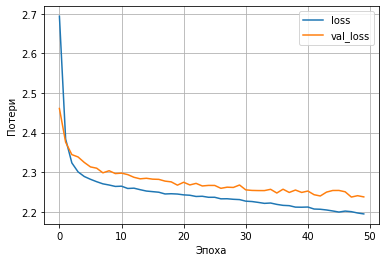

In [100]:
plot_loss(history)

In [101]:
model.evaluate(X_test,  y_test)

72/72 [==============================] - 0s 4ms/step - loss: 2.2233 - accuracy: 0.2776


[2.223318338394165, 0.27755990624427795]

In [102]:
model.evaluate(X_train, y_train)

216/216 [==============================] - 1s 4ms/step - loss: 2.1937 - accuracy: 0.2688


[2.1937241554260254, 0.2688453197479248]

In [101]:
model.save("my_model")

INFO:tensorflow:Assets written to: my_model\assets


In [102]:
reconstructed_model = keras.models.load_model("my_model")

In [103]:
reconstructed_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 128)               768       
                                                                 
 dense_29 (Dense)            (None, 128)               16512     
                                                                 
 dense_30 (Dense)            (None, 22)                2838      
                                                                 
Total params: 20,118
Trainable params: 20,118
Non-trainable params: 0
_________________________________________________________________
